# PROYECTO INTEGRADO - SPRINT 12

## 1. Preparación de datos

**Importación de librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.base import clone

**1.1 Cargamos datos (con fecha como índice) y revisamos las formas de los datasets.**

In [3]:
#Parseamos la columna 'date' como fecha y la usamos de índice
train = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=['date'], index_col='date')
test = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=['date'], index_col='date')
full = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=['date'], index_col='date')

print('train shape:', train.shape)
print('test shape:', test.shape)
print('full shape:', full.shape)

display(train.head(3))
display(test.head(3))
display(full.head(3))

train.info()

train shape: (16860, 86)
test shape: (5856, 52)
full shape: (22716, 86)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

**1.2 Calcularemos la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento.**

In [4]:
#Nombre de columnas necesarias para rougher
C_col = 'rougher.output.concentrate_au'
F_col = 'rougher.input.feed_au'
T_col = 'rougher.output.tail_au'
Target_R = 'rougher.output.recovery'

#Checamos que existan las columnas
for c in [C_col, F_col, T_col, Target_R]:
    if c not in train.columns:
        print("Falta la columna:", c)

#Funcion con EPS para evitar division por cero
def compute_recovery(C, F, T, eps=1e-9):
    num = C * (F - T)
    den = (F * (C - T)) + eps
    return (num/den) * 100

#Calculamos y comparamos con el dataset
calc_r = compute_recovery(train[C_col], train[F_col], train[T_col])
mae_r = np.mean(np.abs(calc_r - train[Target_R]))

print("EAM vs columna oficial rougher.output.recovery:", mae_r.round(6))


EAM vs columna oficial rougher.output.recovery: 0.0


**1.3 ¿Qué columnas están en train y faltan en test?**

In [5]:
train_cols = list(train.columns)
test_cols = list(test.columns)

solo_en_train = [c for c in train_cols if c not in test_cols]
solo_en_test =  [c for c in test_cols if c not in train_cols]

print("Columnas SOLO en train:", len(solo_en_train))
print(solo_en_train[:25]) #Primeras 25 para ver el patrón 

print("\nColumnas SOLO en test:", len(solo_en_test))
print(solo_en_test[:25])

Columnas SOLO en train: 34
['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']

Columnas SOLO en test: 0
[]


Test no trae targets ni algunas *output.*/*calculation.*. Por eso, no podemos usar columnas **output.** como features.

**Seleccionamos features "seguros" (que existen en test y no son output)**

In [6]:
# Quitamos columnas 'output.' (no deben usarse para predecir)
features_candidatas = [c for c in train.columns if not c.startswith('final.output') and not c.startswith('rougher.output')]

# Nos quedamos con las que EXISTEN también en test
features_finales = [c for c in features_candidatas if c in test.columns]

print("Candidatas (sin outputs):", len(features_candidatas))
print("Features finales (en ambos sets):", len(features_finales))

Candidatas (sin outputs): 68
Features finales (en ambos sets): 52


**1.4 Una vez obtenido nuestros features "seguros", procedemos a contruir nuestros features y targets**

In [7]:
# Targets (y)
y_r = train['rougher.output.recovery']
y_f = train['final.output.recovery']

# Features (X)
X_train = train[features_finales].copy()
X_test = test[features_finales].copy()

# Chequeo de nulos (solo para conocer el panorama)
print("Nulos en X_train (top 10):")
print(X_train.isna().sum().sort_values(ascending=False).head(10))

print("\nNulos en X_test (top 10):")
print(X_test.isna().sum().sort_values(ascending=False).head(10))


Nulos en X_train (top 10):
rougher.input.floatbank11_xanthate          1904
primary_cleaner.input.sulfate               1307
primary_cleaner.input.depressant            1262
rougher.input.floatbank10_sulfate           1044
primary_cleaner.input.xanthate               985
rougher.input.floatbank11_sulfate            623
rougher.state.floatbank10_e_air              603
rougher.input.feed_rate                      513
rougher.input.feed_size                      417
secondary_cleaner.state.floatbank2_a_air     363
dtype: int64

Nulos en X_test (top 10):
rougher.input.floatbank11_xanthate          353
primary_cleaner.input.sulfate               302
primary_cleaner.input.depressant            284
rougher.input.floatbank10_sulfate           257
primary_cleaner.input.xanthate              166
rougher.input.floatbank10_xanthate          123
rougher.input.feed_sol                       67
rougher.input.floatbank11_sulfate            55
rougher.input.feed_rate                      40
secondary_c

In [8]:
# Chequeo de duplicados (solo para conocer el panorama)
print("Duplicados en X_train:")
print(train.index.duplicated().sum())
print(train.duplicated().sum())

print("\n Duplicados en X_test:")
print(test.index.duplicated().sum())
print(test.duplicated().sum())

Duplicados en X_train:
0
16

 Duplicados en X_test:
0
6


## 2. Análisis de datos

**2.1.  Observaremos cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.**

Deberíamos esperar que la concentración de **Au** aumente conforme avanza el proceso. Mientras que **Ag y Pb** deberían disminuir porque son impurezas.

In [9]:
# Columnas de concentración de metales en cada etapa
cols_metales = [
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au',
    
    'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag',
    
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb'
]

# Extraemos solo esas columnas
df_metales = train[cols_metales]

df_metales.head()

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
date,,,,,,,,,
2016-01-15 00:00:00,19.793808,34.174427,42.192020,11.500771,8.547551,6.055403,7.101074,10.389648,9.889648
2016-01-15 01:00:00,20.050975,34.118526,42.701629,11.615865,8.558743,6.029369,7.278807,10.497069,9.968944
2016-01-15 02:00:00,19.737170,33.969464,42.657501,11.695753,8.603505,6.055926,7.216833,10.354494,10.213995
2016-01-15 03:00:00,19.320810,28.260743,42.689819,11.915047,7.221879,6.047977,7.175616,8.496563,9.977019
2016-01-15 04:00:00,19.216101,33.044932,42.774141,12.411054,9.089428,6.148599,7.240205,9.986786,10.142511


Con la ayuda de boxplots, compararemos la **distribución y outliers:**

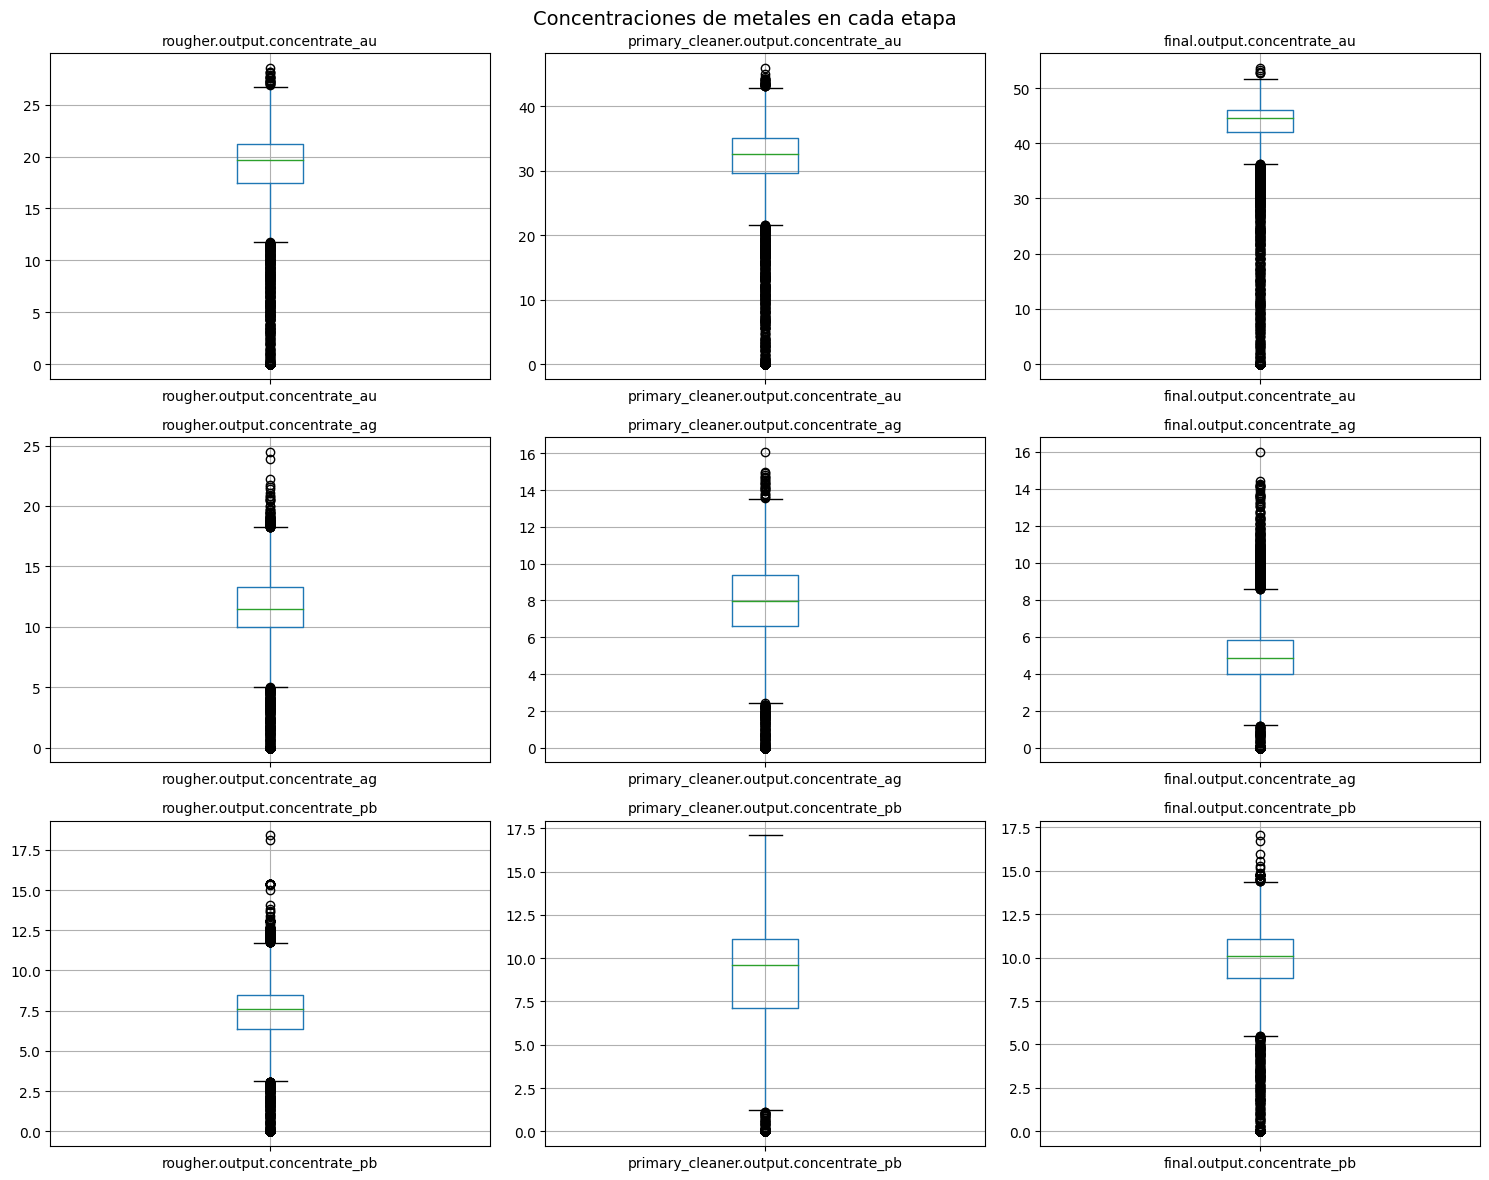

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Concentraciones de metales en cada etapa", fontsize=14)

metales = ['au', 'ag', 'pb']
etapas = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']

for i, metal in enumerate(metales):
    for j, etapa in enumerate(etapas):
        col = etapa + metal
        ax = axes[i, j]
        df_metales.boxplot(column=col, ax=ax)
        ax.set_title(col, fontsize=10)
        
plt.tight_layout()
plt.show()

Calcularemos promedios por etapa, esto nos data una idea general (sin fijarnos en outliers todavía)

In [11]:
# Calculamos promedios de cada metal por etapa
promedios = {
    "Au": [
        df_metales['rougher.output.concentrate_au'].mean(),
        df_metales['primary_cleaner.output.concentrate_au'].mean(),
        df_metales['final.output.concentrate_au'].mean()
    ],
    "Ag": [
        df_metales['rougher.output.concentrate_ag'].mean(),
        df_metales['primary_cleaner.output.concentrate_ag'].mean(),
        df_metales['final.output.concentrate_ag'].mean()
    ],
    "Pb": [
        df_metales['rougher.output.concentrate_pb'].mean(),
        df_metales['primary_cleaner.output.concentrate_pb'].mean(),
        df_metales['final.output.concentrate_pb'].mean()
    ]
}

pd.DataFrame(promedios, index=["Rougher", "Primary_cleaner", "Final"])

,Au,Ag,Pb
Rougher,17.401541,10.580475,6.880322
Primary_cleaner,29.164596,7.422640,8.620294
Final,39.467217,4.716907,9.113559


Con estos resultados podemos ver que el proceso si concentra **Au** y reduce **Ag**, sin embargo el **Pb** sube (debería bajar), toca investigar con más detalle.

**2.2. Compararemos las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba.**

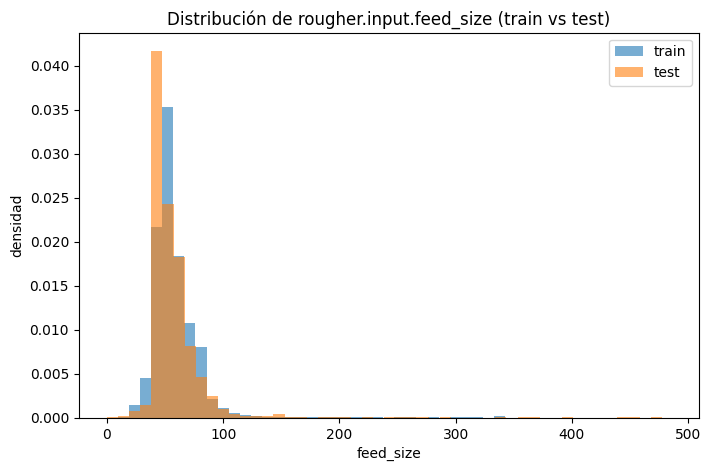

In [12]:
#Graficamos histogramas superpuestos
col_feed = 'rougher.input.feed_size'
assert col_feed in train.columns, f"No existe {col_feed} en train"
assert col_feed in test.columns,  f"No existe {col_feed} en test"

feed_train = train[col_feed].dropna()
feed_test  = test[col_feed].dropna()

# Histogramas normalizados para comparar
plt.figure(figsize=(8,5))
plt.hist(feed_train, bins=50, density=True, alpha=0.6, label='train')
plt.hist(feed_test,  bins=50, density=True, alpha=0.6, label='test')
plt.title('Distribución de rougher.input.feed_size (train vs test)')
plt.xlabel('feed_size')
plt.ylabel('densidad')
plt.legend()
plt.show()

Calcularemos medidas de tendencia central y dispersión para **train** y **test**.

In [13]:
#Resumen numérico (media/mediana/desv/IQR)
def iqr(x):
    q1, q3 = np.percentile(x, [25, 75])
    return q3 - q1

summary_feed = pd.DataFrame({
    'mean':   [feed_train.mean(),  feed_test.mean()],
    'median': [feed_train.median(),feed_test.median()],
    'std':    [feed_train.std(),   feed_test.std()],
    'IQR':    [iqr(feed_train),    iqr(feed_test)]
}, index=['train','test'])

summary_feed

,mean,median,std,IQR
train,58.676444,54.104257,23.922591,17.475185
test,55.937535,50.002004,22.724254,17.747583


Con esto podemos observar que **train** y **test** tienen variabilidad comparable

Ahora compararemos formalmente si train y test podrían venir de la misma distribución con la prueba KS.
Con esto confirmaremos lo que vimos en el gráfico y el resumen numérico.

In [14]:
# Si el p-valor > 0.05, no hay evidencia fuerte de que difieran.
#El “overlap” es una métrica casera donde 1 = distribuciones casi iguales.

try:
    ks_stat, ks_p = ks_2samp(feed_train, feed_test)
except Exception as e:
    ks_stat, ks_p = np.nan, np.nan
    print("No se pudo ejecutar KS test).", e)

# Overlap por intersección de histogramas normalizados
hist_train, bin_edges = np.histogram(feed_train, bins=100, density=True)
hist_test, _ = np.histogram(feed_test,  bins=bin_edges, density=True)
overlap = np.sum(np.minimum(hist_train, hist_test)) * (bin_edges[1]-bin_edges[0])

print(f"KS stat: {ks_stat:.4f}  |  p-value: {ks_p:.4f}")
print(f"Overlap: {overlap:.4f}")

KS stat: 0.1923  |  p-value: 0.0000
Overlap: 0.7932


* Podemos ver que la prueba KS nos arroja un valor muy bajo y el pvalue nos sugiere que estadisticamente sí difieren.

* Asimismo, podemos ver que el Overlap es casi 8, esto nos indica que se parecen bastante las distribuciones, sin embargo no son indenticas.

**Considero que no hay un problema serio de distribución, ya que los histogramas están bastante solapados y muestran una dispersión muy similar. Por lo que podemos entrenar el modelo en train y esperar que generalice bien en test**

**2.3 Revisaremos la suma de concentraciones de todas las sustanacias en las diferentes etapas**
* La suma de concentraciones debería estar entre 0 y 100%
* Los valores negativos o mayores a 100, serán identificados como **anomalias**

Esto es importante porque los outliers extremos pueden sesgar los modelos. Si detectamos casos así, procederemos a eliminarlos.

In [15]:
#Buscamos columnas con concentraciones
conc_cols = [c for c in train.columns if 'concentrate' in c or 'feed' in c]

#Mostramos algunas
conc_cols[:15]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate']

Como resultado obtuvimos algunas de las columnas donde podemos encontrar porcentajes de sustancias (Au, Ag, Pb, sol, etc)

Procedemos a sumar las concentraciones por etapa, en este caso revisaremos **3 etapas clave:**
* rougher.input
* rougher.output.concentrate
* final.output.concentrate

In [16]:
#Sumamos las concentraciones en rougher.input
train['sum_feed'] = train.filter(like='rougher.input.feed_').sum(axis=1)

#Sumamos en rougher.output.concentrate
train['sum_rougher'] = train.filter(like='rougher.output.concentrate_').sum(axis=1)

#Sumamos en final.output.concentrate
train['sum_final'] = train.filter(like='final.output.concentrate_').sum(axis=1)

#Revisamos primeros valores
train[['sum_feed', 'sum_rougher', 'sum_final']].head()

,sum_feed,sum_rougher,sum_final
date,,,
2016-01-15 00:00:00,630.712958,66.424950,63.644396
2016-01-15 01:00:00,633.228361,67.012710,63.957723
2016-01-15 02:00:00,638.147188,66.103793,64.311180
2016-01-15 03:00:00,651.444670,65.752751,63.573449
2016-01-15 04:00:00,644.438245,65.908382,64.004667


In [17]:
train[['sum_feed','sum_rougher','sum_final']].describe()

,sum_feed,sum_rougher,sum_final
count,16860.000000,16860.000000,16860.000000
mean,530.100040,59.837827,61.191370
std,194.125194,24.166922,21.736070
min,0.000000,0.000000,0.000000
25%,477.374513,61.394517,66.511626
50%,589.410200,68.325658,68.800020
75%,656.841425,73.016415,70.693053
max,976.821081,90.964431,80.210644


Una vez obtenidas las metricas estadísticas, procedemos a contar los valores anómalos.

In [18]:
#Creamos una función para detectar anomalias (<0 o >100)
def contar_anomalias(serie):
    return((serie < 0) | (serie > 100)).sum()

anom_feed = contar_anomalias(train['sum_feed'])
anom_rougher = contar_anomalias(train['sum_rougher'])
anom_final = contar_anomalias(train['sum_final'])

print("Anomalías feed:", anom_feed)
print("Anomalías rougher:", anom_rougher)
print("Anomalías final:", anom_final)

Anomalías feed: 15294
Anomalías rougher: 0
Anomalías final: 0


Observamos que tenemos un gran número de **"anomalías"** en feed, esto explica también los valores anómalos que nos arrojo en el describe.

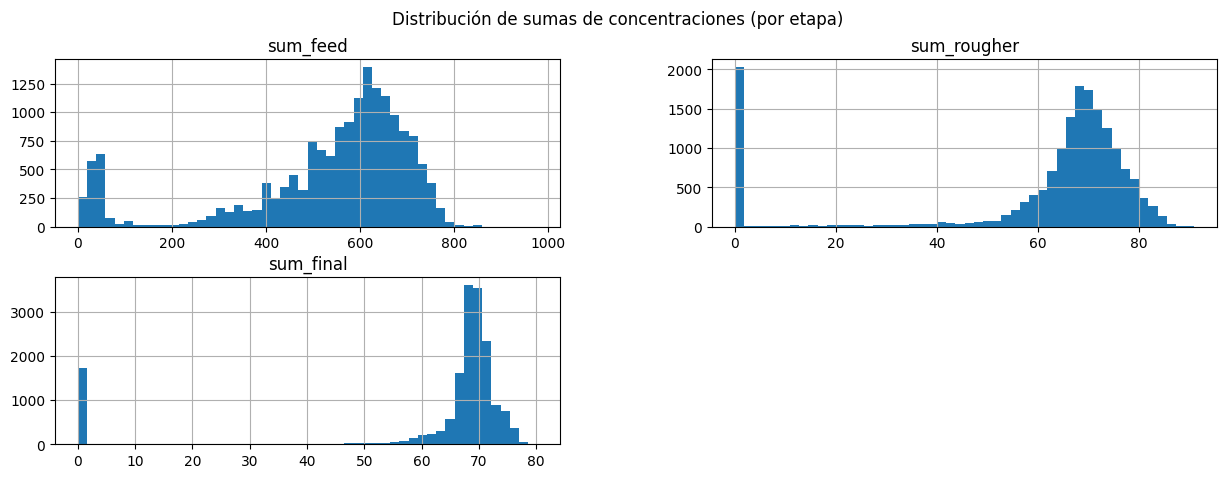

In [19]:
#Visualizamos las sumas de concentraciones por etapa

train[['sum_feed','sum_rougher','sum_final']].hist(bins=50, figsize=(15,5))
plt.suptitle("Distribución de sumas de concentraciones (por etapa)")
plt.show()

Ya con los histogramas podemos darle mas sentido a los datos:

* La etapa de **feed** probablemente no esta en proporción (%), sino en unidades absolutas de concentración (masa, gramos, tonelada, etc), así que no es un error, es la naturaleza de esa variable.
* Las etapas **Rougher** y **Final** nos arrojaron buenos datos, no se encontraron anomalias graves en las etapas que si deberían estar normalizadas.

Esto significa que **NO se necesita eliminar filas adicionales en train/test, por concentraciones absurdas**. Solo quedará pendiente el tema de duplicados, que lo resolveremos junto antes de modelar.

## 3. Construcción del modelo

**3.1 Escribiremos una función para calcular el valor de sMAPE y sMAPE final**

In [20]:
#sMAPE en porcentaje (eps evita div/0)

def smape (y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return np.mean(np.abs(y_pred - y_true) / (denom + eps)) * 100.0
    

In [21]:
#sMAPE final ponderado: 25% rougher + 75% final.
def smape_final(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    s_r = smape(y_true_tougher, y_pred_rougher)
    s_f = smape(y_true_final, y_pred_final)
    return 0.25 * s_r + 0.75 * s_f
    

3.2 En los siguientes pasos **entrenaremos modelos**, los evaluaremos aplicando **validación cruzada** y se elegirá al mejor modelo probandolo utilizando la muestra de prueba.

In [22]:
#Primero recontstruimos features/target desde 'train' limpio eliminando duplicados.
#Quitamos duplicados exactos por índice (timestamps repetidos)
train_clean = train[~train.index.duplicated(keep='first')].copy()

#Quitamos duplicados por filas (si las hay)
train_clean = train_clean.drop_duplicates().copy()

#Rehacemos features/target cib kas nusnas 'features_finales' definidas antes
X_train = train_clean[features_finales].copy()

#Descartamos filas donde TARGET sea NaN ya que no sirven para entrenar
y_train_rougher = train_clean['rougher.output.recovery'].dropna()
y_train_final = train_clean['final.output.recovery'].dropna()

#Alineamos X con las filas que tienen ambos targets válidos
common_idx = y_train_rougher.index.intersection(y_train_final.index)
X_train = X_train.loc[common_idx]
y_train_rougher = y_train_rougher.loc[common_idx]
y_train_final = y_train_final.loc[common_idx]

X_test = test[features_finales].copy()

print("Shapes tras limpieza:")
print("X_train:", X_train.shape, ", y_r:", y_train_rougher.shape, ", y_f:", y_train_final.shape)
print("X_test:", X_test.shape)

Shapes tras limpieza:
X_train: (14149, 52) , y_r: (14149,) , y_f: (14149,)
X_test: (5856, 52)


Este código es útil principalmente porque:
* Elimina duplicados reales (por índice y por filas)
* Alinea X_train solo con filas que SI tienen ambos targets (rougher y final)
* Deja todo listo para que el pipeline impute nulos en features automaticamente

**Ahora definiremos el pipeline por el tipo de modelo**

In [23]:
#Crearemos una funcion donde devuelva un Pipeline segun el modelo elegido. 

def make_pipeline(model_name, rf_params=None):
    """
    Devuelve un pipeline para 'linreg' o 'rf'.
    - linreg: imputer(median) + scaler + LinearRegression
    - rf:     imputer(median) + RandomForestRegressor(**rf_params)
    """
    if model_name == "linreg":
        return Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
            ("model", LinearRegression())
        ])
    if model_name == "rf":
        return Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("model", RandomForestRegressor(n_estimators=100, max_depth=None, n_jobs=-1, random_state=12345))        
        ])
    raise ValueError("Modelo no soportado usa LinReg o RandomForest")

* **Imputer (median)** rellena NaN
* **Scaler** nos ayuda a darle estabilidad a nuestro modelo de regresión lineal

De ser necesario, podemos integrar más modelos y de esta forma escalar nuestra función.

Aplicaremos **validación cruzada** con sMAPE final (dos targets).

Para esto necesitamos evaluar dos modelos "gemelos" (uno por target) con el mismo tipo de pipeline y luego combinar sus predicciones para calcular el sMAPE final.

In [24]:
#Funcion de CV (KFold) que calcula sMAPE rougher/final y combinado.
def cv_smape_final(model_name, X, y_r, y_f, n_splits=5, rf_params=None):
    """
    Entrena dos pipelines del mismo tipo (uno por target) en CV,
    produce predicciones out-of-fold y devuelve:
    - sMAPE rougher
    - sMAPE final
    - sMAPE combinado (25/75)
    """

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=12345)

    # out of fold arrays
    y_pred_r = np.zeros_like(y_r.values, dtype=float)
    y_pred_f = np.zeros_like(y_f.values, dtype=float)
    #idx = np.arange(len(y_r)) #Asumimos que y_r y y_f ya están alineados y en el mismo orden

    for tr_idx, va_idx in kf.split(X):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_r_tr, y_r_va = y_r.iloc[tr_idx], y_r.iloc[va_idx]
        y_f_tr, y_f_va = y_f.iloc[tr_idx], y_f.iloc[va_idx]

        #Clonamos pipelines para cada fold
        pipe_r = make_pipeline(model_name)
        pipe_f = make_pipeline(model_name)

        #Entrenamos en el fold
        pipe_r.fit(X_tr, y_r_tr)
        pipe_f.fit(X_tr, y_f_tr)

        #Predecimos en el fold de validación
        y_pred_r[va_idx] = pipe_r.predict(X_va)
        y_pred_f[va_idx] = pipe_f.predict(X_va)

    #Metricas
    s_r = smape(y_r.values, y_pred_r)
    s_f = smape(y_f.values, y_pred_f)
    s_fin = 0.25 * s_r + 0.75 * s_f
    
    return s_r, s_f, s_fin

* Se usaron KFold (5 folds) para evitar **data leakage**.
* Entrena un pipeline por target en cada fold y guarda las predicciones **OOF**
* Calcula **sMAPE por target** y el **sMAPE final** (combinado)

In [ ]:
resultados = []

for name in ["linreg", "rf"]:
    rf_params = dict(n_estimators=100, random_state=100, n_jobs=-1) if name == "rf" else None
    s_r, s_f, s_fin = cv_smape_final(name, X_train, y_train_rougher, y_train_final, n_splits=5, rf_params=rf_params)
    resultados.append({"modelo": name, "sMAPE_rougher": s_r, "sMAPE_final": s_f, "sMAPE_combinado": s_fin})

res_df = pd.DataFrame(resultados).sort_values("sMAPE_combinado").reset_index(drop=True)
res_df

best_name = res_df.iloc[0]['modelo']
print("Mejor modelo:", best_name)

* Comparamos los modelos con CV de manera homogenea

Ya que tenemos el modelo ganador, entrenaremos dos pipelines usando todo el X_train y luego predecimos para X_test

In [ ]:
#rf_params=dict(n_estimators=100, random_state=12345, n_jobs=-1)
pipe_r_best = make_pipeline(best_name,rf_params=dict(n_estimators=100, random_state=12345, n_jobs=-1) if best_name=="rf" else None)
pipe_f_best = make_pipeline(best_name,rf_params=dict(n_estimators=100, random_state=12345, n_jobs=-1) if best_name=="rf" else None)

pipe_r_best.fit(X_train, y_train_rougher)
pipe_f_best.fit(X_train, y_train_final)

#Predecimos test
pred_r_test = pipe_r_best.predict(X_test)
pred_f_test = pipe_f_best.predict(X_test)

#Clipping de [0, 100], porque la recuperación es un porcentaje que va de 0 - 100, la funcion clic recorta outliers, con esto evitamos metricas distorcionados o interpretaciones imposibles
pred_r_test = np.clip(pred_r_test, 0, 100)
pred_f_test = np.clip(pred_f_test, 0, 100)

#Empaquetar en un DataFrame con el índice de test
preds_test = pd.DataFrame({
    "rougher.output.recovery": pred_r_test,
    "final.output.recovery": pred_f_test
}, index=X_test.index)

preds_test.head()

* Entrenamos el modelo final con todos los datos disponibles
* Predice ambos objetivos en test (que no trae y reales)
* Clip 

In [ ]:
#Facilitamos los resultados en un CSV
preds_test.to_csv("zyfra_predictions_test.csv")
print("Archivo guardado: zyfra_predictions_test.csv")

## Conclusiones Finales

* El análisis exploratorio mostró que el proceso sí concentra el oro **(Au)** de manera efectiva a lo largo de las etapas, incrementando su proporción del 17% en rougher hasta casi 40% en el concentrado final.
  
* Las impurezas como la plata **(Ag)** disminuyen de manera consistente, confirmando la eficiencia del proceso de purificación.

* El plomo **(Pb)**, en cambio, mostró un aumento a lo largo de las etapas, lo cual indica un posible arrastre no deseado que podría estudiarse más a fondo desde el punto de vista químico o operacional.

* Al comparar las distribuciones de feed_size entre train y test, encontramos que son bastante similares (overlap 0.79), lo que da confianza en la generalización del modelo.

* La suma de concentraciones en las etapas de salida (rougher.output, final.output) resultó estar en rangos lógicos (0–100%), sin anomalías relevantes.

* En cuanto al modelado, se compararon dos enfoques:

    *  Regresión Lineal (baseline) con sMAPE final ≈ 9.36%
    *  Random Forest con sMAPE final ≈ 6.96%

+ El **Random Forest** fue el modelo más adecuado para este caso, mostrando mejor capacidad de capturar las relaciones no lineales del proceso y reduciendo el error de predicción.

**En conclusión**, el prototipo de modelo desarrollado cumple con el objetivo de predecir la recuperación de oro en Zyfra con alta precisión, ofreciendo un **sMAPE final < 7%**, lo cual representa un nivel de error aceptable para aplicaciones en la industria minera.